# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [19]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [20]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 30
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews
Scraping page 21
   ---> 2100 total reviews
Scraping page 22
   ---> 2200 total reviews
Scraping page 23
   ---> 2300 total reviews
Scrapi

In [21]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | An airline that lives in the...
1,✅ Trip Verified | Check-in Desk rude and dism...
2,✅ Trip Verified | I chose British Airways espe...
3,Not Verified | I booked Premium Economy from I...
4,✅ Trip Verified | A simple story with an unfor...


In [22]:
df

,reviews
0,✅ Trip Verified | An airline that lives in the...
1,✅ Trip Verified | Check-in Desk rude and dism...
2,✅ Trip Verified | I chose British Airways espe...
3,Not Verified | I booked Premium Economy from I...
4,✅ Trip Verified | A simple story with an unfor...
...,...
2995,Comfortable seats and plenty of space but the ...
2996,Due to a health issue I chose to fly business ...
2997,YYZ-DXB via LHR. Outbound flight YYZ-LHR was d...
2998,British Airways business class is outclassed b...


In [23]:



df['verification_status'] = ''
df['review_text'] = ''


for index, row in df.iterrows():
    parts = row['reviews'].split('|')
    if len(parts) == 2:  
        verify_info = parts[0].strip()  
        review_text = parts[1].strip()

        df.at[index, 'verification_status'] = 1 if verify_info == '✅ Trip Verified' else 0
        df.at[index, 'review_text'] = review_text


df.drop(columns=['reviews'], inplace=True)

print(df)


     verification_status                                        review_text
0                      1  An airline that lives in their past glory and ...
1                      1  Check-in Desk rude and dismissive. Flight late...
2                      1  I chose British Airways especially because I w...
3                      0  I booked Premium Economy from INV to LAX (via ...
4                      1  A simple story with an unfortunate outcome tha...
...                  ...                                                ...
2995                                                                       
2996                                                                       
2997                                                                       
2998                                                                       
2999                                                                       

[3000 rows x 2 columns]


In [24]:
df.to_csv("BA_reviews.csv")

In [25]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 30
page_size = 100


def extract_rating_categories(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")
    rating_categories = set()

    reviews = soup.find_all("div", class_="review-stats")
    for review in reviews:
        rows = review.find_all("tr")
        for row in rows:
            header = row.find("td", class_="review-rating-header")
            if header:
                rating_categories.add(header.get_text(strip=True))

    return rating_categories

rating_categories = extract_rating_categories(base_url)

rating_categories.add("Rating Value")

data = {category: [] for category in rating_categories}

for i in range(1, pages + 1):
    print(f"Scraping page {i}")
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")

    reviews = soup.find_all("article", itemprop="review")
    for review in reviews:
        review_data = {category: None for category in rating_categories}

        # Extract the "Rating Value" from the additional <div>
        rating_div = review.find("div", itemprop="reviewRating")
        if rating_div:
            rating_value = rating_div.find("span", itemprop="ratingValue")
            if rating_value:
                review_data["Rating Value"] = int(rating_value.get_text(strip=True))

        rows = review.find_all("tr")
        for row in rows:
            header = row.find("td", class_="review-rating-header")
            value = row.find("td", class_="review-value")
            rating_stars = row.find_all("span", class_="star fill")
            rating = len(rating_stars)

            if header and value:
                header_text = header.get_text(strip=True)
                value_text = value.get_text(strip=True)
                review_data[header_text] = value_text

            if rating_stars:
                header_text = header.get_text(strip=True)
                review_data[header_text] = rating

        for category, value in review_data.items():
            data[category].append(value)

df_details = pd.DataFrame(data)
print(df)


Scraping page 1
Scraping page 2
Scraping page 3
Scraping page 4
Scraping page 5
Scraping page 6
Scraping page 7
Scraping page 8
Scraping page 9
Scraping page 10
Scraping page 11
Scraping page 12
Scraping page 13
Scraping page 14
Scraping page 15
Scraping page 16
Scraping page 17
Scraping page 18
Scraping page 19
Scraping page 20
Scraping page 21
Scraping page 22
Scraping page 23
Scraping page 24
Scraping page 25
Scraping page 26
Scraping page 27
Scraping page 28
Scraping page 29
Scraping page 30
     verification_status                                        review_text
0                      1  An airline that lives in their past glory and ...
1                      1  Check-in Desk rude and dismissive. Flight late...
2                      1  I chose British Airways especially because I w...
3                      0  I booked Premium Economy from INV to LAX (via ...
4                      1  A simple story with an unfortunate outcome tha...
...                  ...                   

In [26]:
df_details

,Route,Seat Comfort,Inflight Entertainment,Ground Service,Food & Beverages,Cabin Staff Service,Wifi & Connectivity,Type Of Traveller,Date Flown,Aircraft,Seat Type,Recommended,Value For Money,Rating Value
0,Madrid to London,1.0,NaN,1.0,NaN,1.0,NaN,Family Leisure,July 2023,A321,Business Class,no,1,1
1,Rhodes to Gatwick,2.0,1.0,1.0,1.0,3.0,1.0,Family Leisure,July 2023,None,Economy Class,no,2,2
2,Barcelona to London,1.0,1.0,1.0,1.0,4.0,1.0,Family Leisure,July 2023,None,Economy Class,no,1,1
3,Inverness to Los Angeles via London,NaN,NaN,NaN,NaN,NaN,NaN,Couple Leisure,November 2022,None,Premium Economy,no,1,1
4,London City Airport to Frankfurt,3.0,NaN,1.0,NaN,3.0,NaN,Couple Leisure,July 2023,None,Economy Class,no,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,None,3.0,3.0,NaN,1.0,2.0,NaN,None,None,None,Business Class,no,3,3
2996,None,5.0,5.0,NaN,2.0,3.0,NaN,None,None,None,Business Class,no,2,5
2997,None,3.0,5.0,NaN,3.0,4.0,NaN,None,None,None,Economy Class,yes,5,8
2998,None,2.0,1.0,NaN,1.0,2.0,NaN,None,None,None,Business Class,no,1,2


In [27]:
df

,verification_status,review_text
0,1,An airline that lives in their past glory and ...
1,1,Check-in Desk rude and dismissive. Flight late...
2,1,I chose British Airways especially because I w...
3,0,I booked Premium Economy from INV to LAX (via ...
4,1,A simple story with an unfortunate outcome tha...
...,...,...
2995,,
2996,,
2997,,
2998,,


Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [28]:
combined_df = pd.concat([df, df_details], axis=1)


In [29]:
combined_df.head()

,verification_status,review_text,Route,Seat Comfort,Inflight Entertainment,Ground Service,Food & Beverages,Cabin Staff Service,Wifi & Connectivity,Type Of Traveller,Date Flown,Aircraft,Seat Type,Recommended,Value For Money,Rating Value
0,1,An airline that lives in their past glory and ...,Madrid to London,1.0,NaN,1.0,NaN,1.0,NaN,Family Leisure,July 2023,A321,Business Class,no,1,1
1,1,Check-in Desk rude and dismissive. Flight late...,Rhodes to Gatwick,2.0,1.0,1.0,1.0,3.0,1.0,Family Leisure,July 2023,None,Economy Class,no,2,2
2,1,I chose British Airways especially because I w...,Barcelona to London,1.0,1.0,1.0,1.0,4.0,1.0,Family Leisure,July 2023,None,Economy Class,no,1,1
3,0,I booked Premium Economy from INV to LAX (via ...,Inverness to Los Angeles via London,NaN,NaN,NaN,NaN,NaN,NaN,Couple Leisure,November 2022,None,Premium Economy,no,1,1
4,1,A simple story with an unfortunate outcome tha...,London City Airport to Frankfurt,3.0,NaN,1.0,NaN,3.0,NaN,Couple Leisure,July 2023,None,Economy Class,no,1,1


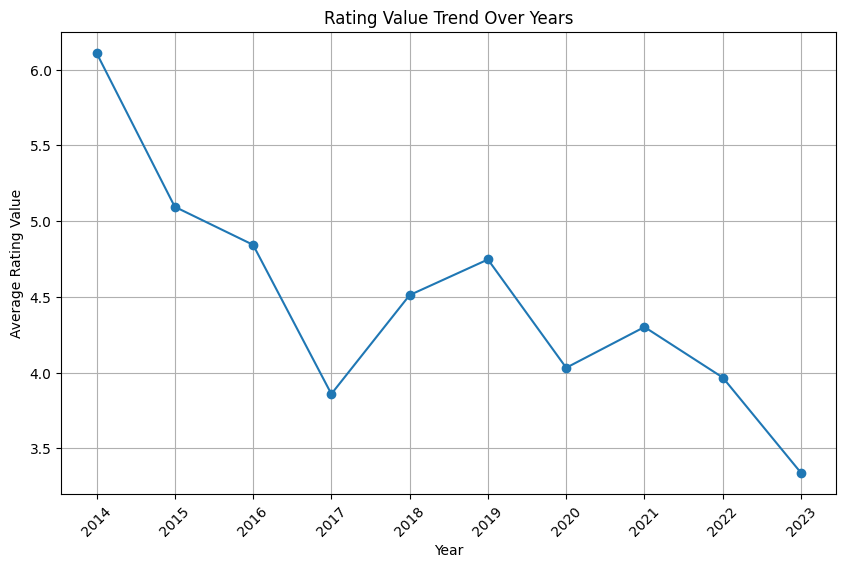

In [30]:
import pandas as pd
import matplotlib.pyplot as plt


combined_df['Date Flown'] = pd.to_datetime(combined_df['Date Flown'], format='%B %Y')


combined_df['Year'] = combined_df['Date Flown'].dt.year


rating_trends = combined_df.groupby('Year')['Rating Value'].mean()


plt.figure(figsize=(10, 6))
plt.plot(rating_trends.index, rating_trends.values, marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Average Rating Value')
plt.title('Rating Value Trend Over Years')
plt.xticks(rating_trends.index, rotation=45)
plt.grid(True)
plt.show()


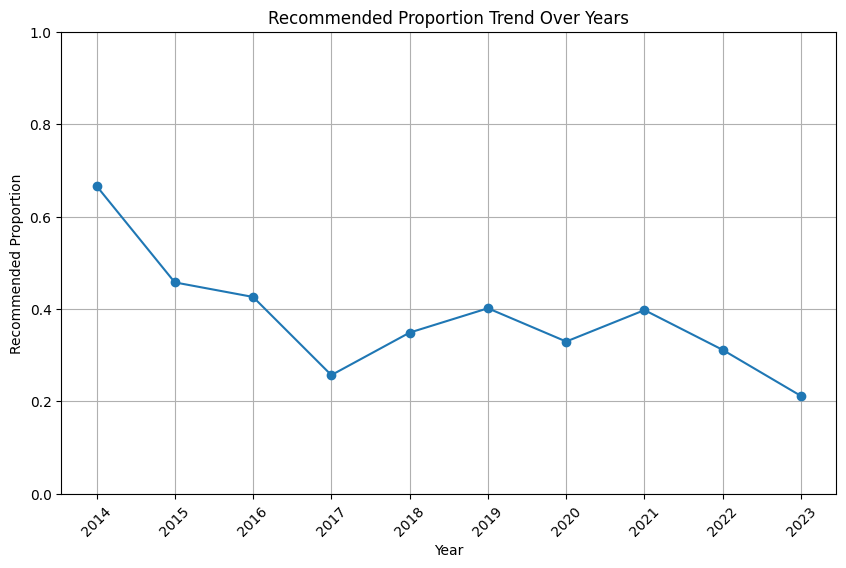

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

combined_df['Recommended'] = combined_df['Recommended'].map({'yes': 1, 'no': 0})

combined_df['Year'] = combined_df['Date Flown'].dt.year

recommendation_trends = combined_df.groupby('Year')['Recommended'].mean()

plt.figure(figsize=(10, 6))
plt.plot(recommendation_trends.index, recommendation_trends.values, marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Recommended Proportion')
plt.title('Recommended Proportion Trend Over Years')
plt.xticks(recommendation_trends.index, rotation=45)
plt.ylim(0, 1)  
plt.grid(True)
plt.show()


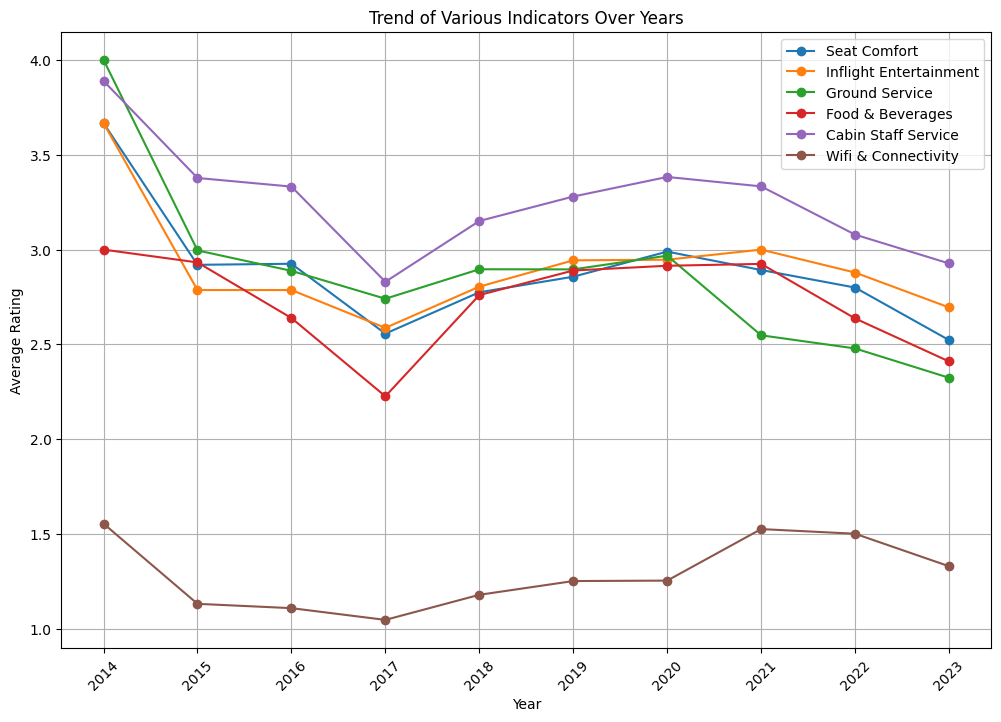

In [46]:


indicator_columns = ['Seat Comfort', 'Inflight Entertainment', 'Ground Service', 
                     'Food & Beverages', 'Cabin Staff Service', 'Wifi & Connectivity']

for column in indicator_columns:
    combined_df[column] = pd.to_numeric(combined_df[column], errors='coerce')


combined_df['Year'] = combined_df['Date Flown'].dt.year


indicator_trends = combined_df.groupby('Year')[indicator_columns].mean()


plt.figure(figsize=(12, 8))
for column in indicator_columns:
    plt.plot(indicator_trends.index, indicator_trends[column], marker='o', linestyle='-', label=column)

plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.title('Trend of Various Indicators Over Years')
plt.xticks(indicator_trends.index, rotation=45)
plt.grid(True)
plt.legend()
plt.show()
